In [5]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import folium

In [6]:
for i in range(6):
    print('../data/bike_rent_{}.csv'.format(i+1))

../data/bike_rent_1.csv
../data/bike_rent_2.csv
../data/bike_rent_3.csv
../data/bike_rent_4.csv
../data/bike_rent_5.csv
../data/bike_rent_6.csv


In [7]:
bikes_temp = {}
for i in range(6):
    bikes_temp[i] = pd.read_csv('../data/bike_rent_{}.csv'.format(i+1), encoding='cp949', parse_dates=['대여일시'])

In [8]:
bikes_temp

{0:             자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
 0       SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
 1       SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
 2       SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
 3       SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
 4       SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230
 ...           ...                 ...       ...                ...   ...   ...
 399994  SPB-16680 2019-06-28 17:14:00       316         종각역 1번출구 앞    16  2360
 399995  SPB-07874 2019-06-28 16:59:00       345         서울보증보험본사 앞    32  1880
 399996  SPB-21622 2019-06-28 16:44:00       526           용답토속공원 앞    64  6100
 399997  SPB-20056 2019-06-28 17:46:00       453  종로오가 지하쇼핑센터 14번출구     7   880
 399998  SPB-18692 2019-06-28 17:34:00       345         서울보증보험본사 앞    35  1820
 
 [399999 rows x 6 columns],
 1:    

In [9]:
# 일부파일 확인
bikes_temp[5].head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-21524,2019-06-20 08:44:00,2202,청계산입구역 1번출구,8,790
1,SPB-08966,2019-06-20 18:00:00,2202,청계산입구역 1번출구,5,1470
2,SPB-09048,2019-06-20 17:56:00,2202,청계산입구역 1번출구,9,1820
3,SPB-05661,2019-06-20 20:40:00,2202,청계산입구역 1번출구,6,1490
4,SPB-05353,2019-06-20 20:41:00,2202,청계산입구역 1번출구,8,1480


In [10]:
bikes = pd.concat(bikes_temp, axis='index', ignore_index=True)
bikes.head() #앞부분 5개
bikes.tail() #뒷부분 5개


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
2215627,SPB-22438,2019-06-24 07:40:00,240,문래역 4번출구 앞,13,900
2215628,SPB-24455,2019-06-25 07:34:00,240,문래역 4번출구 앞,6,880
2215629,SPB-24557,2019-06-26 08:19:00,240,문래역 4번출구 앞,7,930
2215630,SPB-00649,2019-06-27 07:38:00,240,문래역 4번출구 앞,11,1030
2215631,SPB-14209,2019-06-28 07:37:00,240,문래역 4번출구 앞,6,1010


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 101.4+ MB


In [12]:
bikes.shape

(2215632, 6)

In [13]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '이용시간', '이용거리'], dtype='object')

In [14]:
bikes.describe()

,대여일시,대여 대여소번호,이용시간,이용거리
count,2215632,2.215632e+06,2.215632e+06,2.215632e+06
mean,2019-06-16 08:40:01.500303872,1.226154e+03,2.716998e+01,3.912916e+03
min,2019-06-01 00:00:00,3.000000e+00,1.000000e+00,0.000000e+00
25%,2019-06-08 22:04:00,5.050000e+02,8.000000e+00,1.220000e+03
50%,2019-06-16 15:13:00,1.159000e+03,1.700000e+01,2.270000e+03
75%,2019-06-23 20:22:00,1.846000e+03,3.700000e+01,4.670000e+03
max,2019-06-30 23:59:00,9.998000e+03,3.133000e+03,2.323100e+05
std,NaN,8.499197e+02,2.908119e+01,5.145471e+03


In [15]:
pd.options.display.float_format='{:2f}'.format 
#위에거 정수로 바꾸는방법

In [16]:
bikes.describe()

,대여일시,대여 대여소번호,이용시간,이용거리
count,2215632,2215632.000000,2215632.000000,2215632.000000
mean,2019-06-16 08:40:01.500303872,1226.154183,27.169981,3912.916414
min,2019-06-01 00:00:00,3.000000,1.000000,0.000000
25%,2019-06-08 22:04:00,505.000000,8.000000,1220.000000
50%,2019-06-16 15:13:00,1159.000000,17.000000,2270.000000
75%,2019-06-23 20:22:00,1846.000000,37.000000,4670.000000
max,2019-06-30 23:59:00,9998.000000,3133.000000,232310.000000
std,NaN,849.919678,29.081187,5145.471002


In [17]:
bikes.isnull()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2215627,False,False,False,False,False,False
2215628,False,False,False,False,False,False
2215629,False,False,False,False,False,False
2215630,False,False,False,False,False,False


In [18]:
bikes.isnull().sum()
#누락 값 더하기 0 이면 누락이 없다.!

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

In [19]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 101.4+ MB


In [20]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [21]:
bikes['대여일시']

0         2019-06-03 08:49:00
1         2019-06-03 08:33:00
2         2019-06-05 08:27:00
3         2019-06-05 08:46:00
4         2019-06-10 08:27:00
                  ...        
2215627   2019-06-24 07:40:00
2215628   2019-06-25 07:34:00
2215629   2019-06-26 08:19:00
2215630   2019-06-27 07:38:00
2215631   2019-06-28 07:37:00
Name: 대여일시, Length: 2215632, dtype: datetime64[ns]

In [22]:
bikes['대여일시'].dt.day

0           3
1           3
2           5
3           5
4          10
           ..
2215627    24
2215628    25
2215629    26
2215630    27
2215631    28
Name: 대여일시, Length: 2215632, dtype: int32

In [23]:
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(50)


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10
5,SPB-13926,2019-06-11 08:29:00,646,장한평역 1번출구 (국민은행앞),7,1360,11
6,SPB-14638,2019-06-12 08:29:00,646,장한평역 1번출구 (국민은행앞),5,1340,12
7,SPB-18588,2019-06-17 08:34:00,646,장한평역 1번출구 (국민은행앞),8,1360,17
8,SPB-21148,2019-06-17 08:47:00,646,장한평역 1번출구 (국민은행앞),22,1330,17
9,SPB-24533,2019-06-18 08:36:00,646,장한평역 1번출구 (국민은행앞),6,1230,18


In [24]:
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes.head(10)


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8
5,SPB-13926,2019-06-11 08:29:00,646,장한평역 1번출구 (국민은행앞),7,1360,11,8
6,SPB-14638,2019-06-12 08:29:00,646,장한평역 1번출구 (국민은행앞),5,1340,12,8
7,SPB-18588,2019-06-17 08:34:00,646,장한평역 1번출구 (국민은행앞),8,1360,17,8
8,SPB-21148,2019-06-17 08:47:00,646,장한평역 1번출구 (국민은행앞),22,1330,17,8
9,SPB-24533,2019-06-18 08:36:00,646,장한평역 1번출구 (국민은행앞),6,1230,18,8


In [25]:
bikes['대여일시'].dt.dayofweek

0          0
1          0
2          2
3          2
4          0
          ..
2215627    0
2215628    1
2215629    2
2215630    3
2215631    4
Name: 대여일시, Length: 2215632, dtype: int32

In [26]:
# 요일추가를 람다 활용하기
요일= ["월", "화", "수", "목", "금", "토", "일"]

bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월
...,...,...,...,...,...,...,...,...,...
2215627,SPB-22438,2019-06-24 07:40:00,240,문래역 4번출구 앞,13,900,24,7,월
2215628,SPB-24455,2019-06-25 07:34:00,240,문래역 4번출구 앞,6,880,25,7,화
2215629,SPB-24557,2019-06-26 08:19:00,240,문래역 4번출구 앞,7,930,26,8,수
2215630,SPB-00649,2019-06-27 07:38:00,240,문래역 4번출구 앞,11,1030,27,7,목


In [27]:
bikes['주말구분'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : '평일' if x <5 else "주말")
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일


In [28]:

#bikes['이용시간'] = bikes['이용시간'].dt.dayofweek.apply(lambda x : x/60)
#bikes

In [29]:
# 대여소점 파일 프레임화 하기

bike_shop = pd.read_csv('../data/bike_shop.csv', encoding='cp949')

In [30]:
bike_shop.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5


In [31]:
bike_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      1537 non-null   object 
 1   대여소번호   1537 non-null   int64  
 2   대여소명    1537 non-null   object 
 3   위도      1537 non-null   float64
 4   경도      1537 non-null   float64
 5   거치대수    1537 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 72.2+ KB


In [32]:
bike_gu = bike_shop[['구분','대여소번호','위도','경도']]
bike_gu.head()

,구분,대여소번호,위도,경도
0,마포구,101,37.549561,126.905754
1,마포구,102,37.556000,126.910454
2,마포구,103,37.554951,126.910835
3,마포구,104,37.550629,126.914986
4,마포구,105,37.550007,126.914825


In [33]:
bikes = pd.merge(bikes,bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,구분,대여소번호,위도,경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,646,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,526,37.563511,127.056725
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,646,37.561867,127.064377
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,646,37.561867,127.064377
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,529,37.561371,127.063660


In [34]:
bikes.drop(['대여소번호'], axis='columns', inplace=True)

In [35]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,구분,위도,경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.563511,127.056725


In [36]:
bikes.rename(columns={'구분':'대여구','위도':'대여점위도','경도':'대여점경도'}, inplace=True)
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.563511,127.056725
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.561867,127.064377
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.561867,127.064377
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.561371,127.063660


In [37]:
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
일자          0
대여시간대       0
요일          0
주말구분        0
대여구         0
대여점위도       0
대여점경도       0
dtype: int64

In [38]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.563511,127.056725


In [39]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
#폰트 경로
font_path = "/usr/share/fonts/truetype/NanumFont/NanumGothicBold.ttf"
 
#폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()
 
plt.rcParams["font.family"] = font_name
plt.rcParams["font.size"] = 15

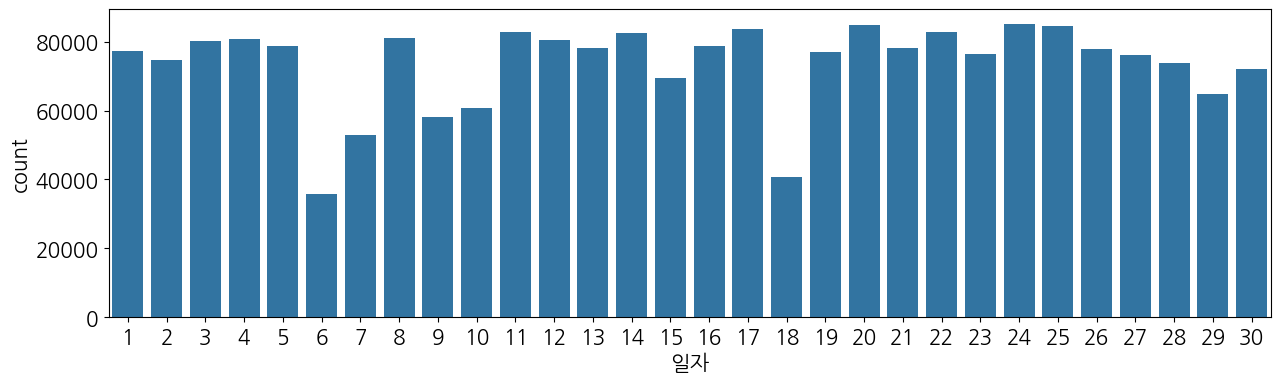

In [40]:
# 일자별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(x='일자', data=bikes);

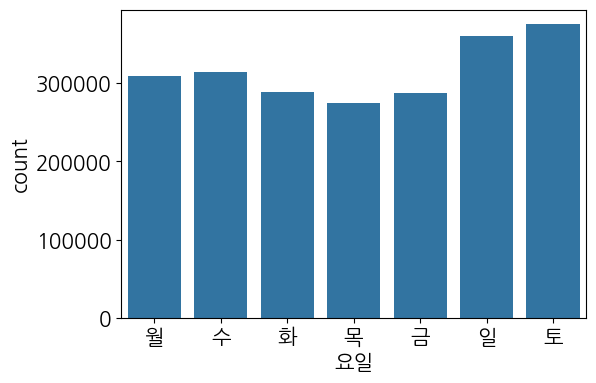

In [41]:
#요일별 따릉이 이용건수
plt.figure(figsize=(6,4))
sns.countplot(x='요일', data=bikes);

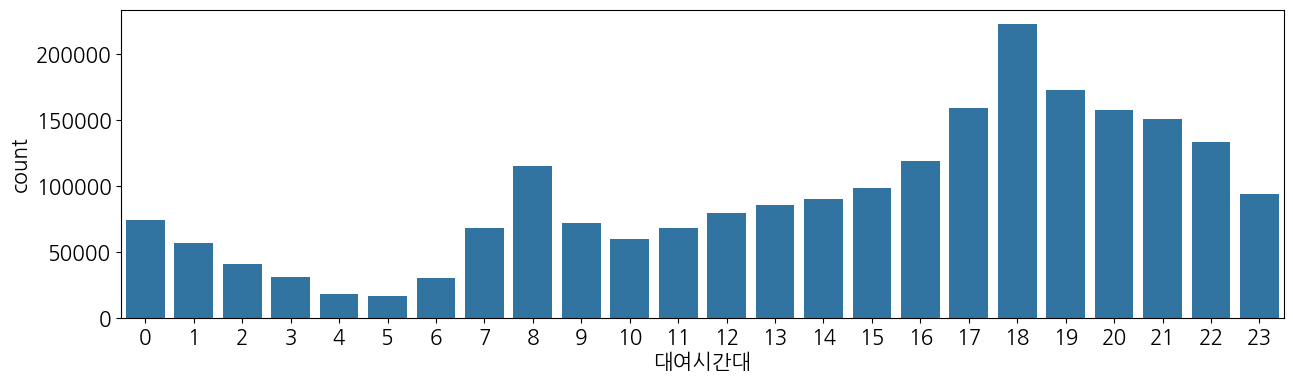

In [42]:
#대여시간
plt.figure(figsize=(15,4))
sns.countplot(x='대여시간대', data=bikes);

In [43]:
# 두가지 요인을 위해 피봇 테이블 생성
bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971
5,2070,2451,2495,2069,2567,2619,2316
6,4252,4534,5393,4455,3311,3345,4633
7,10337,11324,13853,11418,4420,4869,12070
8,17164,17867,23542,18762,6651,8696,22119


In [44]:
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride.head()

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971


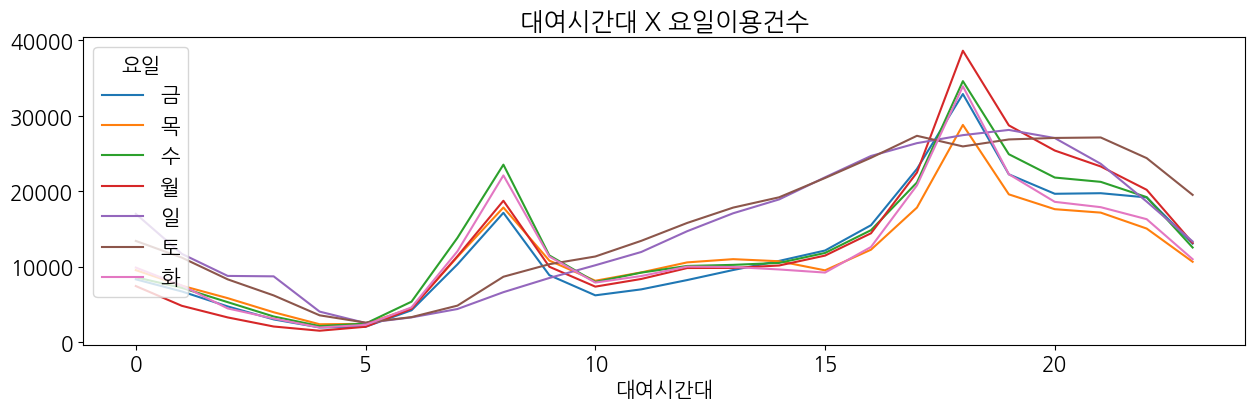

In [45]:
hourly_dayofweek_ride.plot(kind='line', title='대여시간대 X 요일이용건수', figsize=(15,4));

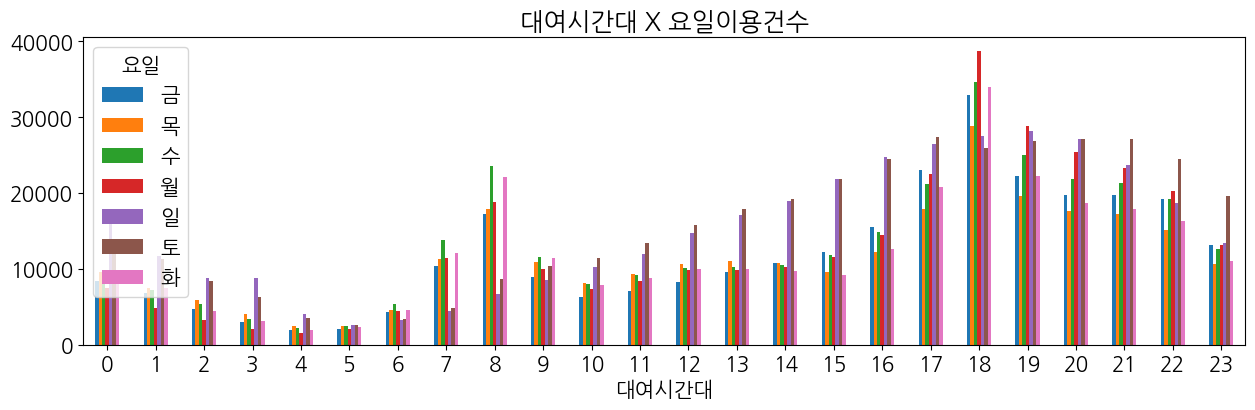

In [46]:
hourly_dayofweek_ride.plot(kind='bar', title='대여시간대 X 요일이용건수', figsize=(15,4), rot=0);

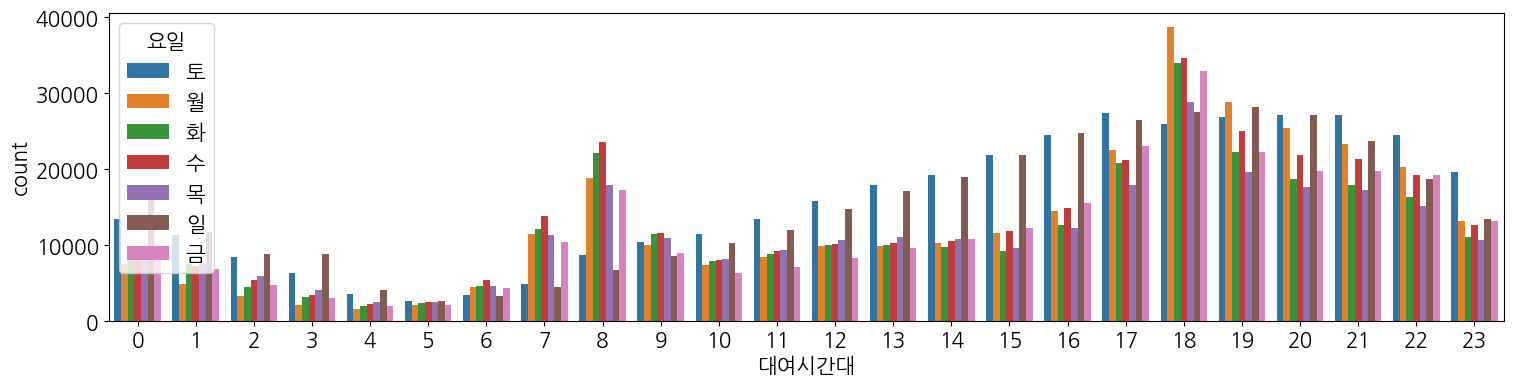

In [47]:
# countplot 으로 막대그래프

plt.figure(figsize=(18,4))
sns.countplot(x='대여시간대', hue='요일', data=bikes);

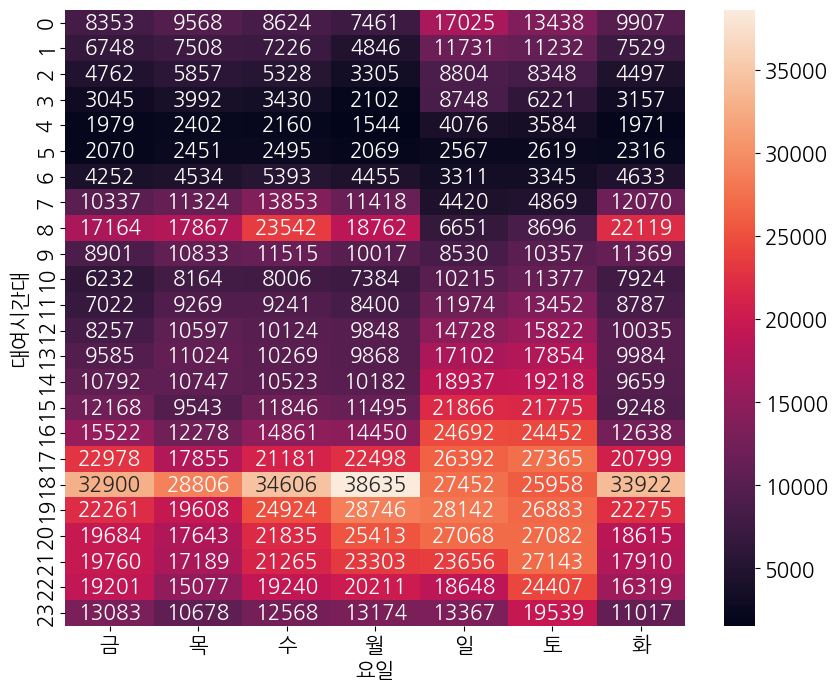

In [48]:
# 히트맵 
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d');

In [49]:
# 주말 구분이 들어간 피봇 테이블
weekdays_hourly_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')
weekdays_hourly_ride.head()

주말구분,주말,평일
대여시간대,,
0,30463,43913
1,22963,33857
2,17152,23749
3,14969,15726
4,7660,10056


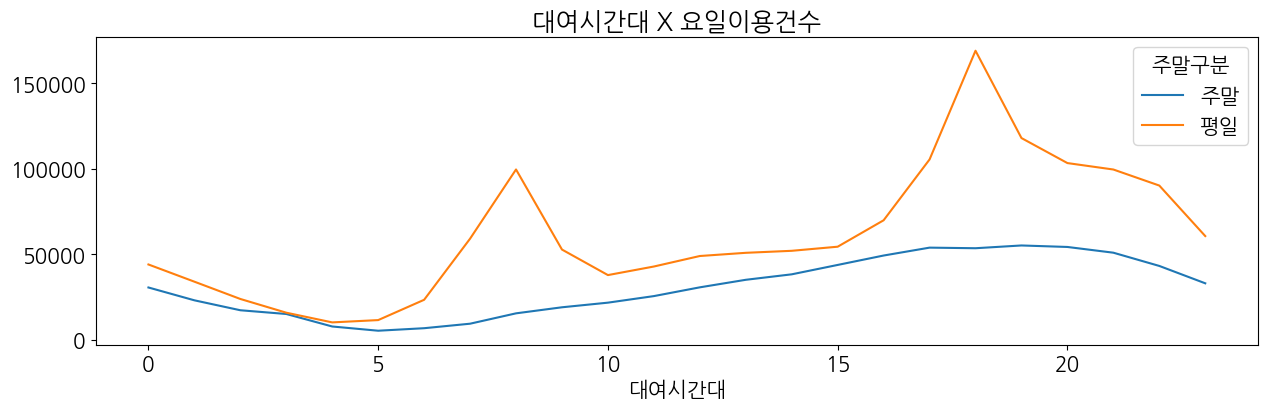

In [50]:
# 주말부분 (선)
weekdays_hourly_ride.plot(kind='line', title='대여시간대 X 요일이용건수', figsize=(15,4)); 

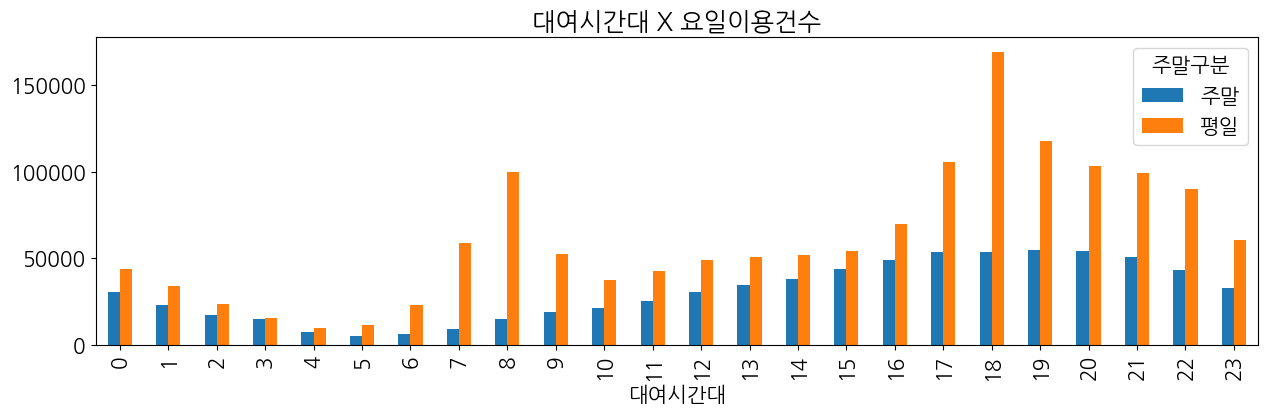

In [51]:
#주말부분 (막대)
weekdays_hourly_ride.plot(kind='bar', title='대여시간대 X 요일이용건수', figsize=(15,4));

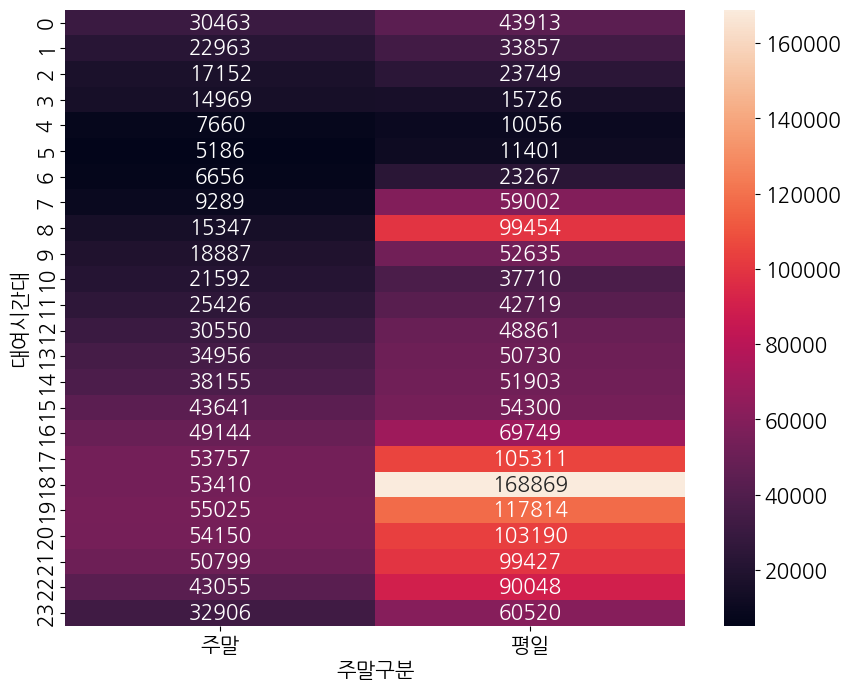

In [52]:
#주말부분 (히트맵)
plt.figure(figsize=(10,8))
sns.heatmap(data=weekdays_hourly_ride, annot=True, fmt='d');

In [54]:
# 장소에 따른 시각화

# 1단계 데이터 모델링
bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')

,자전거번호
대여구,
강남구,97081
강동구,78231
강북구,40563
강서구,141006
관악구,83382
광진구,141996
구로구,78696
금천구,33488
노원구,113823


In [57]:
구별자전거이용건수 = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')
구별자전거이용건수

,자전거번호
대여구,
강남구,97081
강동구,78231
강북구,40563
강서구,141006
관악구,83382
광진구,141996
구로구,78696
금천구,33488
노원구,113823


In [59]:
# 오름차순
구별자전거이용건수.sort_values(by='자전거번호', ascending=True, inplace=True)
구별자전거이용건수

,자전거번호
대여구,
금천구,33488
도봉구,38697
강북구,40563
용산구,47993
중구,48533
동작구,54094
중랑구,56413
은평구,62996
양천구,64154


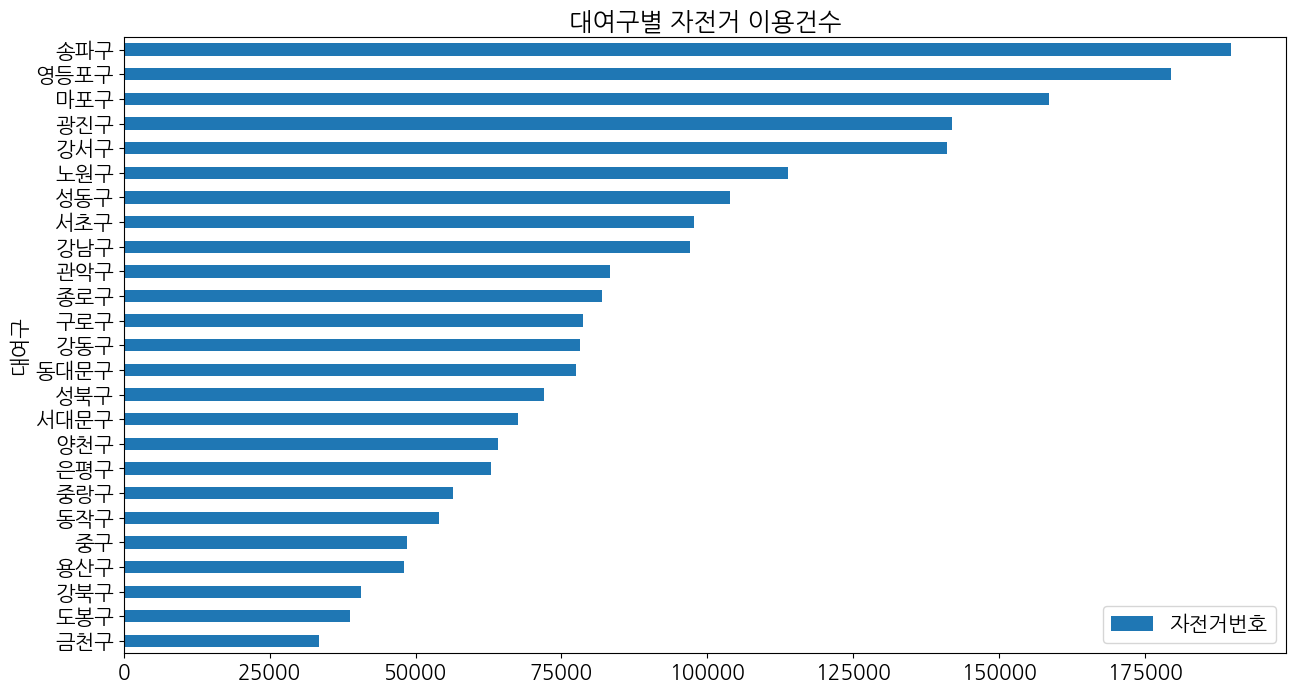

In [62]:
# bar < h 를 넣을시 가로bar 생성이 된다.
구별자전거이용건수.plot(kind='barh', title='대여구별 자전거 이용건수', figsize=(15,8));

In [64]:
구별자전거이용건수.reset_index(inplace=True)
구별자전거이용건수.head(2)

,index,대여구,자전거번호
0,0,금천구,33488
1,1,도봉구,38697


In [70]:
# 서울시 지도 파일을 가져온다.
import json

with open('../data/seoul.json', 'r', encoding='utf-8') as f:
    서울시지도 = json.load(f)

서울시지도

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11540412678968, 37.557491025257455],
      [127.1165206546129, 37.557268061772696],
      [127.1175954493625, 37.55705301284316],
      [127.11879551821994, 37.557222485451305],
      [127.11969651045837, 37.558176474822524],
      [127.12057912633198, 37.5590144597372],
      [127.12146867175024, 37.55986003393365],
      [127.12240146859469, 37.5604208685133],
      [127.12287911525227, 37.56070873375976],
      [127.12303576608339, 37.56078573052513],
      [127.12435254630417, 37.56144246249796],
      [127.12447748580927, 37.56148569898355],
      [127.13349006006634, 37.56465664804646],
      [127.13357625665371, 37.56468978043648],
      [127.1336638698021, 37.56472375596808],
      [127.133755022522

In [72]:
bikes.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.561867,127.064377


In [74]:
# 위도 경도 
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()

lat, lon

(37.54734988442208, 126.99171375924)

In [77]:
center = [lat, lon]

map1 = folium.Map(location=center, zoom_start=11)
map1
